In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
file_path = 'GLEAM.nc'

In [3]:
data = xr.open_dataset(file_path)

In [4]:
header_content = data.__str__()
print(header_content)


<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 720, time: 240)
Coordinates:
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * time     (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2022-12-31
Data variables:
    E        (time, lat, lon) float32 ...
Attributes:
    Dataset:      Global Land Evaporation Amsterdam Model
    Version:      3.7b
    Authors:      Hydro-Climate Extremes Lab (H-CEL)
    Institution:  Ghent University
    Contact:      info@gleam.eu
    Reference1:   Martens, B. et al. 2017: GLEAM v3: satellite-based land eva...
    Reference2:   Miralles, D.G. et al. 2011: Global land-surface evaporation...


In [5]:
variable = data['E']
print(variable)

<xarray.DataArray 'E' (time: 240, lat: 720, lon: 1440)>
[248832000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * time     (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2022-12-31
Attributes:
    standard_name:  Actual evaporation
    long_name:      Actual evaporation from GLEAM 3.7b
    units:          mm.month-1


In [6]:
grouped_E = variable.groupby('time')
for time, variable in grouped_E:
    print(f"{time}")

2003-01-31T00:00:00.000000000
2003-02-28T00:00:00.000000000
2003-03-31T00:00:00.000000000
2003-04-30T00:00:00.000000000
2003-05-31T00:00:00.000000000
2003-06-30T00:00:00.000000000
2003-07-31T00:00:00.000000000
2003-08-31T00:00:00.000000000
2003-09-30T00:00:00.000000000
2003-10-31T00:00:00.000000000
2003-11-30T00:00:00.000000000
2003-12-31T00:00:00.000000000
2004-01-31T00:00:00.000000000
2004-02-29T00:00:00.000000000
2004-03-31T00:00:00.000000000
2004-04-30T00:00:00.000000000
2004-05-31T00:00:00.000000000
2004-06-30T00:00:00.000000000
2004-07-31T00:00:00.000000000
2004-08-31T00:00:00.000000000
2004-09-30T00:00:00.000000000
2004-10-31T00:00:00.000000000
2004-11-30T00:00:00.000000000
2004-12-31T00:00:00.000000000
2005-01-31T00:00:00.000000000
2005-02-28T00:00:00.000000000
2005-03-31T00:00:00.000000000
2005-04-30T00:00:00.000000000
2005-05-31T00:00:00.000000000
2005-06-30T00:00:00.000000000
2005-07-31T00:00:00.000000000
2005-08-31T00:00:00.000000000
2005-09-30T00:00:00.000000000
2005-10-31

In [7]:
eva = data['E'].sel(time='2022-08-31T00:00:00.000000000')

In [8]:
lat= eva['lat'].values
lon = eva['lon'].values

In [9]:
lon_mesh, lat_mesh = np.meshgrid(lon, lat)



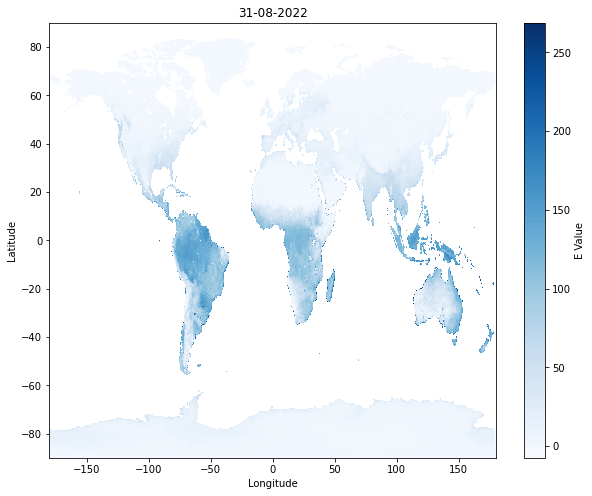

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, variable, cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

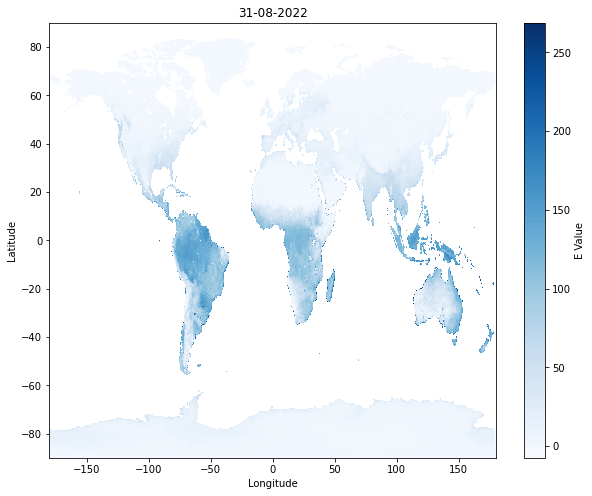

In [11]:
eva = data['E'].sel(time='2003-08-31T00:00:00.000000000')
lat= eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
fig = plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, variable, cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
eva = data['E'].sel(time='2022-12-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

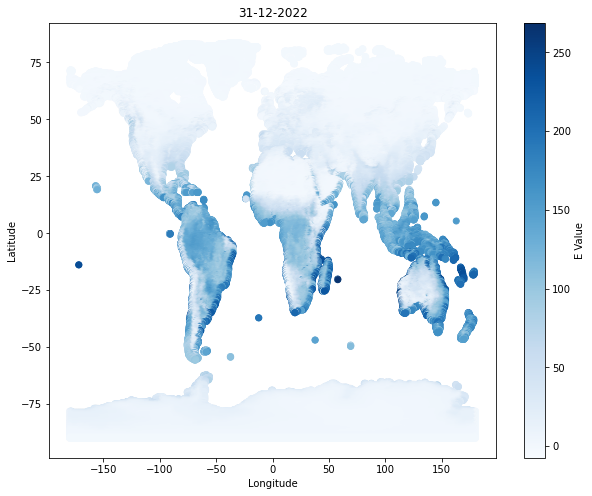

In [13]:
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-12-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

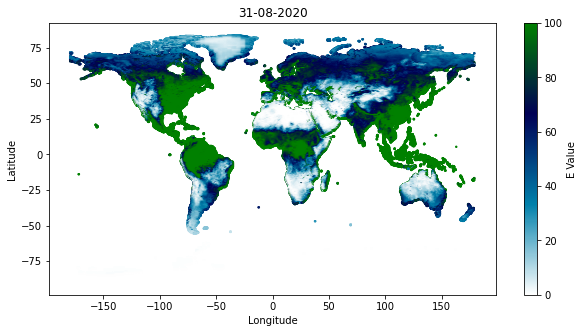

In [14]:
eva = data['E'].sel(time='2020-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 5))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r',  vmin=0, vmax=100, s=2)
plt.colorbar(label='E Value')
plt.title('31-08-2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


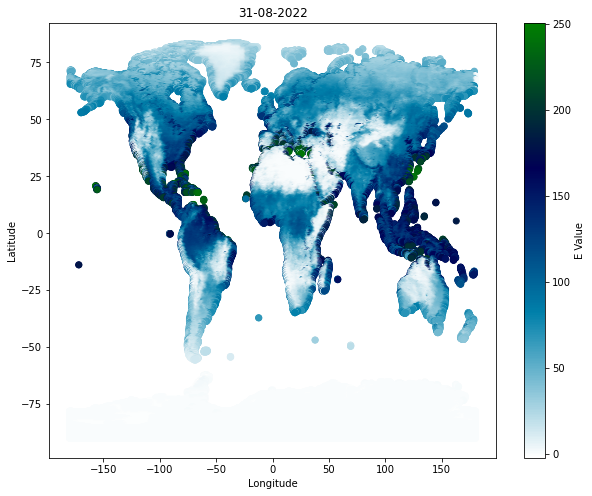

In [35]:
eva = data['E'].sel(time='2022-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r')
plt.colorbar(label='E Value')
plt.title('31-08-2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


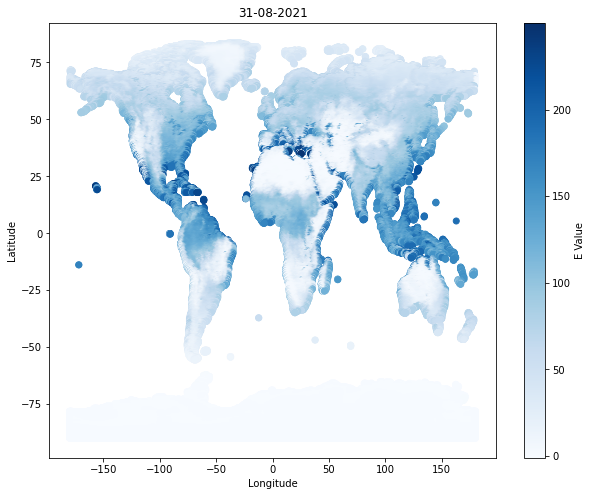

In [16]:
eva = data['E'].sel(time='2021-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2021')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


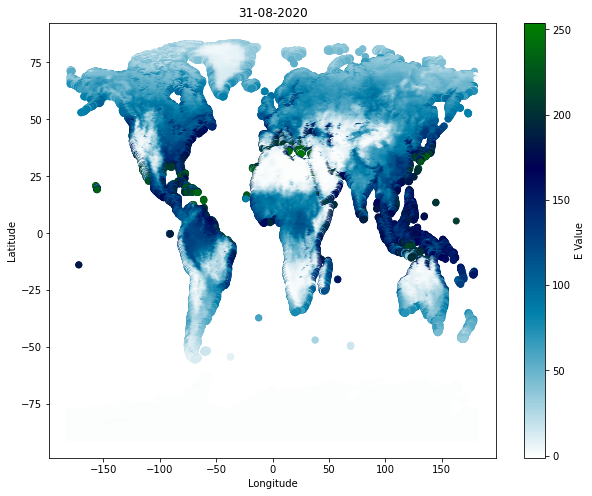

In [36]:
eva = data['E'].sel(time='2020-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r')
plt.colorbar(label='E Value')
plt.title('31-08-2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


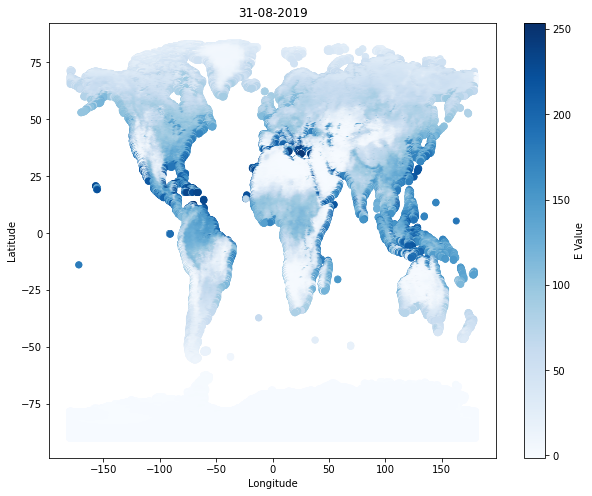

In [18]:
eva = data['E'].sel(time='2019-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2019')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


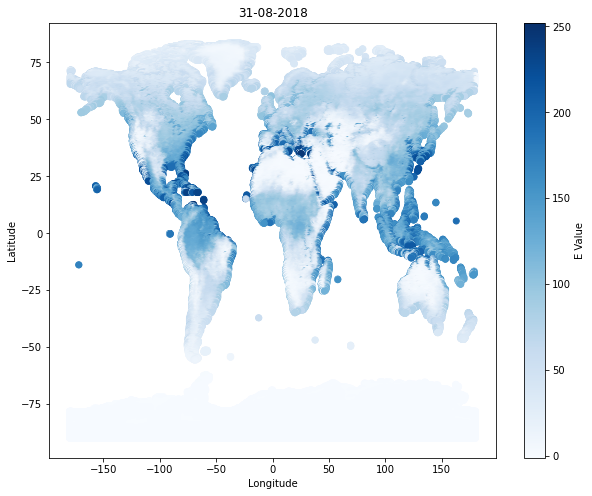

In [19]:
eva = data['E'].sel(time='2018-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2018')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

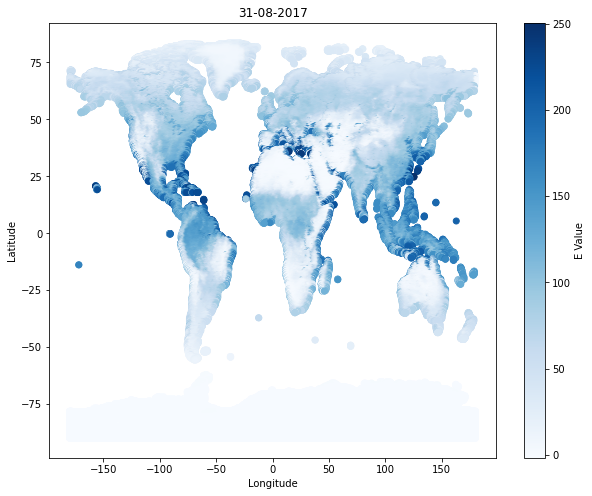

In [20]:
eva = data['E'].sel(time='2017-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2017')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

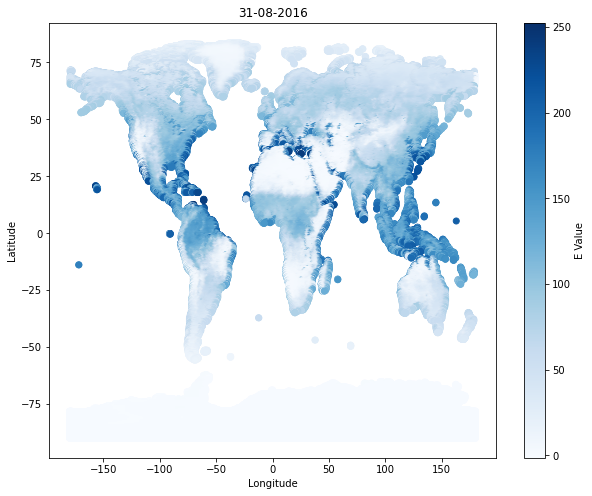

In [21]:
eva = data['E'].sel(time='2016-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

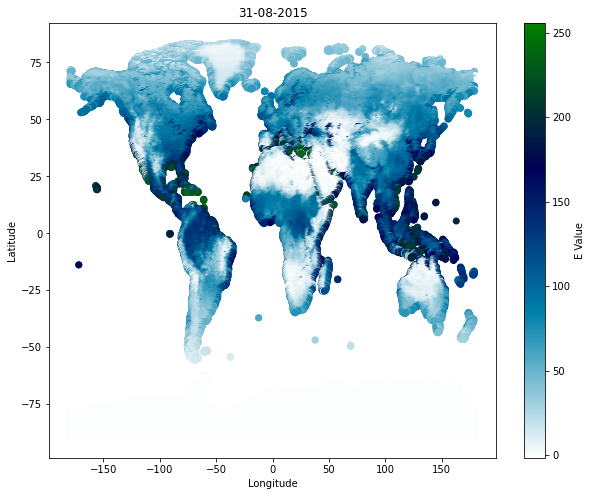

In [37]:
eva = data['E'].sel(time='2015-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r')
plt.colorbar(label='E Value')
plt.title('31-08-2015')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

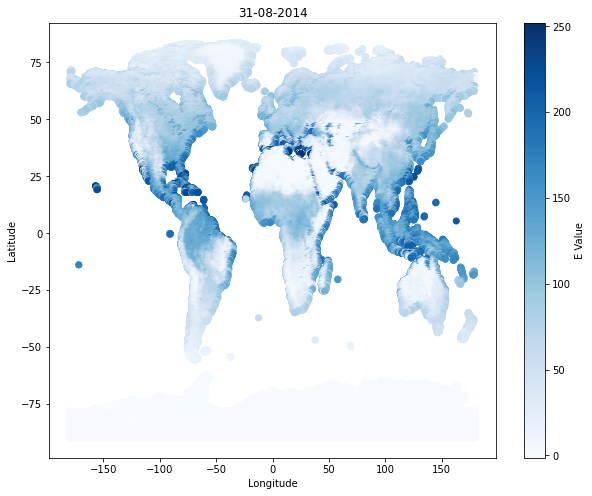

In [23]:
eva = data['E'].sel(time='2014-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2014')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

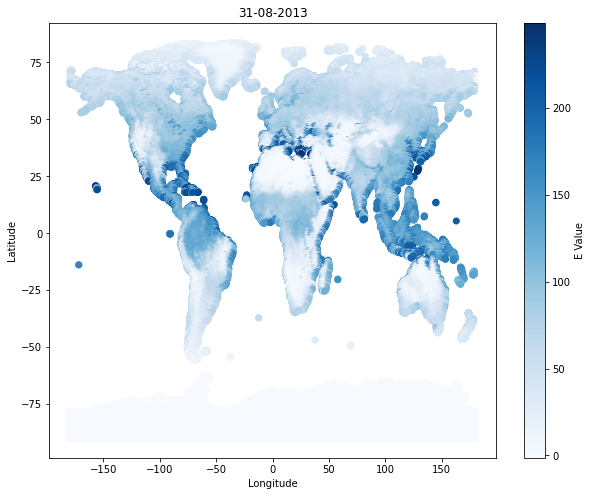

In [24]:
eva = data['E'].sel(time='2013-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='Blues')
plt.colorbar(label='E Value')
plt.title('31-08-2013')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

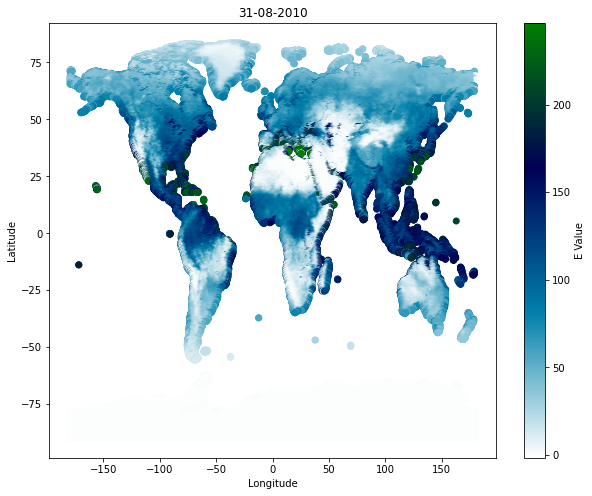

In [38]:
eva = data['E'].sel(time='2010-08-31T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 8))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r')
plt.colorbar(label='E Value')
plt.title('31-08-2010')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [26]:
if np.isnan(variable).all():
    print("No valid data points.")
else:
    monthly_mean = np.nanmean(variable, axis=0)
    monthly_median = np.nanmedian(variable, axis=0)
    monthly_std = np.nanstd(variable, axis=0)
    monthly_min = np.nanmin(variable, axis=0)
    monthly_max = np.nanmax(variable, axis=0)

In [27]:
valid_mask = np.any(~np.isnan(variable), axis=0)
monthly_mean[~valid_mask] = np.nan
monthly_median[~valid_mask] = np.nan
monthly_std[~valid_mask] = np.nan
monthly_min[~valid_mask] = np.nan
monthly_max[~valid_mask] = np.nan

In [28]:
print("Monthly Statistics:")
print("Mean:", monthly_mean)
print("Median:", monthly_median)
print("Standard Deviation:", monthly_std)
print("Minimum:", monthly_min)
print("Maximum:", monthly_max)

Monthly Statistics:
Mean: [ 0.12454133  0.12291494 11.420355   ...  0.          0.
  0.        ]
Median: [0.13087124 0.13018171 0.00509043 ... 0.         0.         0.        ]
Standard Deviation: [ 0.07981315  0.07977609 19.440006   ...  0.          0.
  0.        ]
Minimum: [ 0.         0.        -0.1470666 ...  0.         0.         0.       ]
Maximum: [ 0.2814703  0.2777431 62.512276  ...  0.         0.         0.       ]


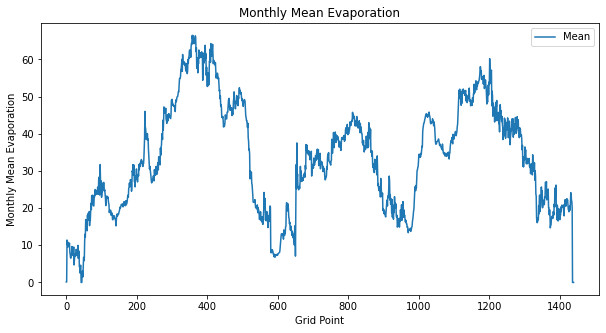

In [29]:
# Plotting the monthly mean
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean.flatten(), label='Mean')
plt.xlabel('Grid Point')
plt.ylabel('Monthly Mean Evaporation')
plt.title('Monthly Mean Evaporation')
plt.legend()
plt.show()

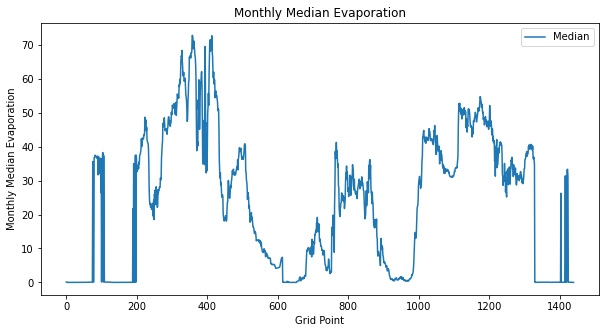

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_median.flatten(), label='Median')
plt.xlabel('Grid Point')
plt.ylabel('Monthly Median Evaporation')
plt.title('Monthly Median Evaporation')
plt.legend()
plt.show()

In [31]:
# Calculate monthly 
monthly_avg = data.groupby('time.month').mean(dim='time')

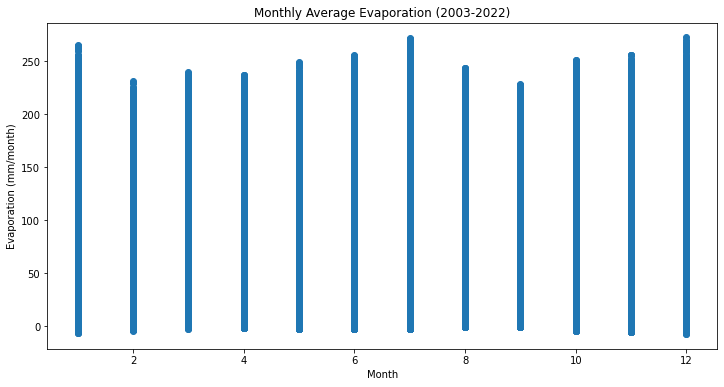

In [32]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the monthly average 
monthly_avg.plot.scatter(ax=ax, x='month', y='E')

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Evaporation (mm/month)')
ax.set_title('Monthly Average Evaporation (2003-2022)')

# Show the plot
plt.show()

In [33]:
# Group the data by month
grouped_data = data.groupby('time.month')

# Compute the mean evaporation across latitudes and longitudes for each month
mean_precip = grouped_data.mean(dim=['lat', 'lon'])

# Extract the time values
time_values = mean_precip['time'].values

# Extract the mean evaporation values for each month
precip_values = mean_precip['E'].values

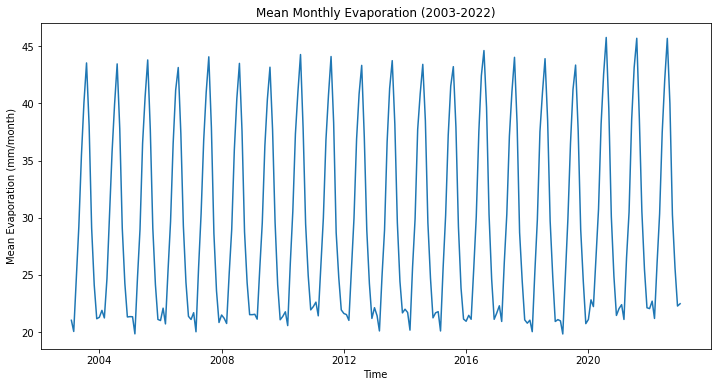

In [34]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series
ax.plot(time_values, precip_values)

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Mean Evaporation (mm/month)')

# Set the title
ax.set_title('Mean Monthly Evaporation (2003-2022)')

# Show the plot
plt.show()